In [48]:
# 세련된 데이터 시각화 패키지, Plotly.
# !pip install plotly
# !pip install cufflinks
# !pip install sort-dataframeby-monthorweek
# !pip install sorted-months-weekdays

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=152a3492478ca7df40e1bf9b8056e52fa82e1571550f5eb85ee65a9f85e51c55
  Stored in directory: c:\users\cpb06gamen\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3439 sha256=679aa76d972457500bf2ccb6d4209abf87dfee8184eadb64c81d49b15b999b93
  Stored in directory: c:\users\cpb06gamen\appdata\local\pip\cache\wheels\f8\84\15\465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3240 sha256=72a7defbe261af51e0d05edcc050aaaf1e8bf24afc45c910ef96e2a3bb9899f8
  Stored in directory: c:\users\cpb06gamen\appdata\local\pip\cache\wheels\9a\0d\2e\309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [203]:
df = pd.read_csv('C:/workspace/Python/머신러닝 플젝/hotel_bookings_cancel.csv', header = 0)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

In [181]:
# 특성 대치 - children, babies
df['children'] = df['children'].fillna(0)
df['babies'] = df['babies'].fillna(0)

In [182]:
# agent를 agent 유무로 대치
df['agent'] = df['agent'].fillna(0)
df.loc[df['agent'] != 0] = 1

In [183]:
df["total_guest"] = df["adults"] + df["children"] + df["babies"]
df["kids"] = df["children"] + df["babies"]
df_ml = df.drop(["adults", "children", "babies", "assigned_room_type", "reserved_room_type","reservation_status", "arrival_date_day_of_month", "required_car_parking_spaces", "total_of_special_requests"], axis = 1)

In [185]:
df_ml['kids'].unique()

array([0., 2., 1., 3.])

In [186]:
df_ml.loc[df['kids'] != 0] = 1

In [187]:
df_ml['kids'].unique()

array([0., 1.])

In [188]:
df_ml['kids'].value_counts()

1.0    103851
0.0     15539
Name: kids, dtype: int64

In [189]:
df_ml

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,customer_type,adr,total_guest,kids
0,0,342,July,0,0,BB,Direct,0,0,0,3,No Deposit,0.0,Transient,0.0,2.0,0.0
1,0,737,July,0,0,BB,Direct,0,0,0,4,No Deposit,0.0,Transient,0.0,2.0,0.0
2,0,7,July,0,1,BB,Direct,0,0,0,0,No Deposit,0.0,Transient,75.0,1.0,0.0
3,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0
4,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0
119386,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0
119387,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0
119388,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1.0,1.0,1.0


In [139]:
X = df.drop(['reservation_status', 'is_canceled'], axis =1)
y = df['is_canceled']

In [140]:
X = pd.get_dummies(X)

In [117]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [119]:
over = RandomOverSampler()

In [120]:
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


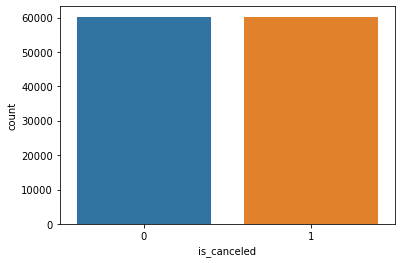

In [121]:
sns.countplot(y_train);

In [122]:
# 로지스틱 회귀모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7655892021117641
평가 데이터 점수 : 0.7693692939107127


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
# 스케일링 lr
scaler = StandardScaler()

In [124]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr.fit(X_train_s, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.777127535943155
평가 데이터 점수 : 0.7825194739927968


In [125]:
# SGD 경사하강법
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
sgd.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(sgd.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(sgd.score(X_test, y_test)))

훈련 데이터 점수 : 0.7698724972606833
평가 데이터 점수 : 0.7761119021693609


In [126]:
# 스케일링 sgd
print('훈련 데이터 점수 : {}'.format(sgd.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(sgd.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.7398313245011123
평가 데이터 점수 : 0.7430689337465449


In [127]:
# KNN
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(kn.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(kn.score(X_test, y_test)))

훈련 데이터 점수 : 0.860967227811535
평가 데이터 점수 : 0.7489320713627607


In [128]:
# 스케일링 KNN
print('훈련 데이터 점수 : {}'.format(kn.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(kn.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.5002739316665007
평가 데이터 점수 : 0.6250523494430019


In [129]:
# dt
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(dt.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(dt.score(X_test, y_test)))

훈련 데이터 점수 : 0.9935750572766212
평가 데이터 점수 : 0.8215093391406315


In [194]:
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
X_train, y_train = over.fit_resample(X_train, y_train)

In [196]:
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

In [197]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.9904556471720651
평가 데이터 점수 : 0.983666973783399


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23878 entries, 5627 to 35158
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       23878 non-null  int64  
 1   stays_in_weekend_nights         23878 non-null  int64  
 2   stays_in_week_nights            23878 non-null  int64  
 3   is_repeated_guest               23878 non-null  int64  
 4   previous_cancellations          23878 non-null  int64  
 5   previous_bookings_not_canceled  23878 non-null  int64  
 6   booking_changes                 23878 non-null  int64  
 7   agent                           23878 non-null  float64
 8   adr                             23878 non-null  float64
 9   total_guest                     23878 non-null  float64
 10  kids                            23878 non-null  float64
 11  arrival_date_month_1            23878 non-null  uint8  
 12  arrival_date_month_April     